In [ ]:
import pandas as pd
import numpy as np
# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


89078/89078 [==============================] - 0s 0us/step


In [ ]:
test_data=pd.read_csv('/content/imdb_urdu_reviews_train.csv')
train_data=pd.read_csv('/content/imdb_urdu_reviews_test.csv')


In [ ]:
train_data.head(), test_data.head()

(                                              review sentiment
 0  یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...  negative
 1  بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...  negative
 2  یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...  negative
 3  اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...  positive
 4  پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...  positive,
                                               review sentiment
 0  میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...  positive
 1  چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...  negative
 2  ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...  positive
 3  مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...  negative
 4  یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...  positive)

In [ ]:
data =  pd.concat([train_data, test_data]).reset_index(drop=True)
print(data.shape)

(26836, 2)


In [ ]:
df =  data.copy()
df

,review,sentiment
0,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...,negative
1,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...,negative
2,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...,negative
3,اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...,positive
4,پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...,positive
...,...,...
26831,نیکول فن (میڈونا) ابھی جیل سے رہا ہوا ہے۔ اگرچ...,positive
26832,میرے خیال میں یہ بہت دلچسپ ہے کہ اس فلم کو سنس...,negative
26833,ہاں یہ یقینی ہے کہ یہ شیر ہے ، یہ زومبی نہیں ہ...,positive
26834,شرم آقا کے پیشہ میں ایک اعلی مقام کی نمائندگی ...,positive


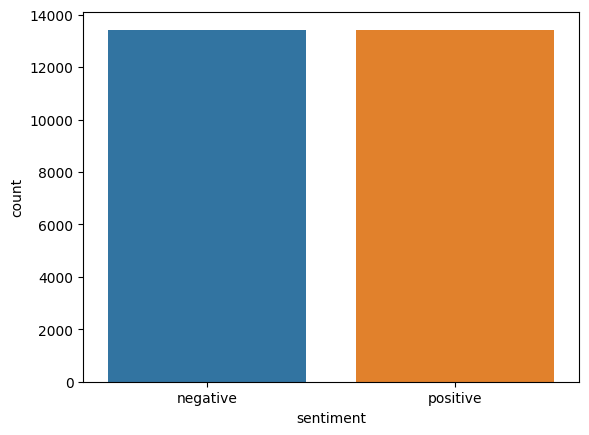

In [ ]:
sns.countplot( x = 'sentiment', data = df );

In [ ]:
# Encode the labels
le = LabelEncoder()
le.fit(df['sentiment'])
df['encoded_sentiments'] = le.transform(df['sentiment'])

In [ ]:
df['review'] = df['review'].apply(normalize)

In [ ]:
df['review'] = df['review'].apply(remove_accents)

In [ ]:
df['review'] = df['review'].apply(replace_urls)

In [ ]:
df['review'] = df['review'].apply(replace_emails)

In [ ]:
df['review'] = df['review'].apply(replace_currency_symbols)

In [ ]:
df['review'] = df['review'].apply(normalize_whitespace)

In [ ]:
# Remove stop words from text
from typing import FrozenSet

In [ ]:
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [ ]:
len(STOP_WORDS)

430

In [ ]:
df[['review']].head(10)

,review
0,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...
1,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...
2,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...
3,اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...
4,پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...
5,میں نے دو وجوہات کی بنا پر یہ ڈی وی ڈی کرایہ پ...
6,انگمار برگ مین کی اسکمین دیکھنے کے بعد ، مجھے ...
7,خوفناک نفسیاتی تھرلر جس کو دیکھنے کے لئے تقریب...
8,مجھے اسٹیون سیگل پسند ہے لیکن میرے پاس کوئی فل...
9,یہ کارنی کی لامتناہی لائن میں شامل ہوجاتا ہے ،...


In [ ]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "

    return lemme_str

In [ ]:
df['review'] =  df['review'].apply(remove_stopwords)

In [ ]:
df['lemmatized_text'] = df['review'].apply(lemitizeStr)

In [ ]:
df['review'][2], df['lemmatized_text'][2]

('عجیب بات حشر ہے۔ ڈی وی ڈی خوردہ فروش ڈسکاؤنٹ تلاش وقت ، مہلک جبلت کاپی آیا۔ فلم کلیکٹر ناطے سائنس فائی ، ہارر غیر ملکی راکشسوں خاصیت ، خریدنے فیصلہ (اس حقیقت ذکر پانچ ڈالر لاگت - سودا ، یقین کریں)۔ دیکھنے ، رائے دیکھا خاص بات ہے۔ انٹرنیٹ تحقیق ، دریافت فلم دراصل بریڈرز کہلاتی ٹم کنکیڈ ہارر فلک ریمیک 1980 دہائی وسط ویڈیو اسٹوروں تیز کیا۔ دیکھ چکا ہوں۔ دریافت "مہلک جبلت" تعریف اضافہ ہوا۔ پرائیوٹ گرلز کالج لان الکا دہل گر تباہ ہوگئی۔ واحد استاد ایشلے (ٹوڈ جینسن ادا کیا۔ ٹھیک ، لڑکا چار سال کلٹ فلک سائبرگ COP سائبرگ تبدیل ہے) ، نوٹس طلباء غائب ، سیاہ فام واقعے سامنا پڑا۔ داغدار چہرے بالوں عورت چمڑے لباس پہنے ہوئے۔ تفتیش پتہ چلتا اجنبی مخلوق الکا سواری مقامی خواتین نسل استعمال نسل پیدا زمین تھی۔ مقامی جاسوس انھیں گمشدگیوں ذمہ دار مانتا ، ایشلے عفریت روکنے کوشش ہے۔ ٹم کنکیڈ (جو جنس پرستوں فحش بنانے صنف چھوڑ گا) ہدایتکاری تیار کردہ اصل بریڈرز ، سائنس فائی / ہارر فلم دراصل پتلی پردہ دار نرم کور فحش فلم شائقین شائقین جلد ل. تیار تھا۔ خیال ، 1980 دہائی بنی بدترین فلموں ہے۔ ریمیک چاہتا معمہ ہے۔

In [ ]:
df[['review', 'lemmatized_text']].head(10)

,review,lemmatized_text
0,بے گھر خواتین دستاویزی فلم ہے۔ لحاظ دلچسپ بات ...,بے گھر خواتین دستاویزی فلم ہے۔ لحاظ دلچسپ بات ...
1,اچھ ،ی کام ، پوری فلم گرڈج بے ترتیب ہلاک تھی۔ ...,اچھ ،ی کام ، پوری فلم گرڈج بے ترتیب ہلاک تھی۔ ...
2,عجیب بات حشر ہے۔ ڈی وی ڈی خوردہ فروش ڈسکاؤنٹ ت...,عجیب بات حشر ہے۔ ڈی وی ڈی خوردہ فروش ڈسکاؤنٹ ت...
3,خاص وکیلوں پولیس اہلکاروں ہے۔ پورٹو ریکو ، چھو...,خاص وکیلوں پولیس اہلکاروں ہے۔ پورٹو ریکو ، چھو...
4,، وضاحت: سرخی ، فلم 8 اسٹارز مجموعی بہترین فلم...,، وضاحت: سرخی ، فلم 8 اسٹارز مجموعی بہترین فلم...
5,وجوہات ڈی وی ڈی کرایہ لی۔ عظیم اداکاروں ، ہدای...,وجوہات ڈی وی ڈی کرایہ لی۔ عظیم اداکاروں ، ہدای...
6,انگمار برگ مین اسکمین دیکھنے ، احساسات ، اہم ب...,انگمار برگ مین اسکمین دیکھنے ، احساسات ، اہم ب...
7,خوفناک نفسیاتی تھرلر دیکھنے تقریبا painful تکل...,خوفناک نفسیاتی تھرلر دیکھنے تقریبا painful تکل...
8,اسٹیون سیگل پسند فلمی فلم ہے۔ فلموں آسانی کھو ...,اسٹیون سیگل پسند فلمی فلم ہے۔ فلموں آسانی کھو ...
9,کارنی لامتناہی لائن شامل ہوجاتا ، 50 سائنس فائ...,کارنی لامتناہی لائن شامل ہوجاتا ، 50 سائنس فائ...


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_text'], df['encoded_sentiments'], test_size = 0.30, random_state = 7, shuffle = True)

In [ ]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (18785,)
Shape of X_test (8051,)
Shape of Y_train (18785,)
Shape of Y_test (8051,)


In [ ]:
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
 #check the dimensions of feature vectors
train_vecs.shape, test_vecs.shape

((18785, 50000), (8051, 50000))

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
# from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout
# from keras.layers.embeddings import Embedding
from keras.layers import Embedding
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
     # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)


REPLICAS:  1


In [ ]:
train_data = train_data.loc[:12000,:]
train_data.shape

(10000, 2)

In [ ]:
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''

    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_text'], df['encoded_sentiments'], test_size = 0.30, random_state = 7, shuffle = True)

In [ ]:
# using keras tokenizer here
# from keras.preprocessing.sequence import pad_sequences
# from keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# # from keras.utils.data_utils import pad_sequences
# from keras.utils import pad_sequences
# from keras.utils import pad_sequences
from tensorflow.keras.utils import pad_sequences

print(pad_sequences)
token = text.Tokenizer(num_words=None)
max_len = 1500

token.fit_on_texts(list(X_train) + list(X_test))
xtrain_seq = token.texts_to_sequences(X_train)
xvalid_seq = token.texts_to_sequences(X_test)

#zero pad the sequences
# preprocessing.sequence.pad_sequences
# tf.keras.utils.pad_sequences(sequence)
xtrain_pad = pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = pad_sequences(xvalid_seq, maxlen=max_len)

word_index = token.word_index

<function pad_sequences at 0x7fb0232600d0>


In [ ]:
%%time
from keras.models import Sequential
from keras.layers import Activation, SimpleRNN

with strategy.scope():
    # A simpleRNN without any pretrained embeddings and one dense layer
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                     300,
                     input_length=max_len))
    model.add(SimpleRNN(100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1500, 300)         29252700  
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               40100     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 29,292,901
Trainable params: 29,292,901
Non-trainable params: 0
_________________________________________________________________
CPU times: user 127 ms, sys: 7 ms, total: 134 ms
Wall time: 149 ms


In [ ]:
model.fit(xtrain_pad, Y_train, epochs=1, batch_size=64*strategy.num_replicas_in_sync)

ValueError: ignored

In [ ]:
scores = model.predict(xvalid_pad)
print("Auc: %.2f%%" % (roc_auc(scores,Y_test)))

252/252 [==============================] - 30s 118ms/step
Auc: 0.88%


In [ ]:
scores_model = []
scores_model.append({'Model': 'SimpleRNN','AUC_Score': roc_auc(scores,Y_test)})

In [ ]:
embeddings_index = {}
f = open('/kaggle/input/glove840b300dtxt/glove.840B.300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

FileNotFoundError: ignored

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 97508/97508 [00:00<00:00, 904098.94it/s]


In [ ]:
%%time
with strategy.scope():

    # A simple LSTM with glove embeddings and one dense layer
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))

    model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1500, 300)         29252700  
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 29,413,201
Trainable params: 160,501
Non-trainable params: 29,252,700
_________________________________________________________________
CPU times: user 254 ms, sys: 113 ms, total: 367 ms
Wall time: 369 ms


In [ ]:
model.fit(xtrain_pad, Y_train, epochs=5, batch_size=64*strategy.num_replicas_in_sync)

Epoch 1/5
294/294 [==============================] - 1765s 6s/step - loss: 0.6933 - accuracy: 0.4980
Epoch 2/5
294/294 [==============================] - 1734s 6s/step - loss: 0.6933 - accuracy: 0.4962
Epoch 3/5
294/294 [==============================] - 1734s 6s/step - loss: 0.6933 - accuracy: 0.4957
Epoch 4/5
294/294 [==============================] - 1729s 6s/step - loss: 0.6932 - accuracy: 0.4945
Epoch 5/5
294/294 [==============================] - 1771s 6s/step - loss: 0.6932 - accuracy: 0.4991


In [ ]:
scores = model.predict(xvalid_pad)
print("Auc: %.2f%%" % (roc_auc(scores,Y_test)))

252/252 [==============================] - 105s 414ms/step
Auc: 0.50%


In [ ]:
scores_model.append({'Model': 'LSTM','AUC_Score': roc_auc(scores,Y_test)})

In [ ]:
%%time
import keras
from keras.models import Sequential
from keras.layers import GRU
import numpy as np
with strategy.scope():
    # GRU with glove embeddings and two dense layers
     model = Sequential()
     model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
    #  GRU = tf.keras.layers.GRU(1, return_sequences=True, return_state=True)
    # #  GRU = tf.keras.layers.GRU(4)
     model.add(SpatialDropout1D(0.3))
     model.add(GRU(300))
     model.add(Dense(1, activation='sigmoid'))

     model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 1500, 300)         29252700  
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 1500, 300)        0         
 lDropout1D)                                                     
                                                                 
 gru_2 (GRU)                 (None, 300)               541800    
                                                                 
 dense_3 (Dense)             (None, 1)                 301       
                                                                 
Total params: 29,794,801
Trainable params: 542,101
Non-trainable params: 29,252,700
_________________________________________________________________
CPU times: user 428 ms, sys: 96.4 ms, total: 524 ms
Wall time: 556 ms


In [ ]:
model.fit(xtrain_pad, Y_train, epochs=5, batch_size=64*strategy.num_replicas_in_sync)

Epoch 1/5
294/294 [==============================] - 45s 152ms/step - loss: 0.6933 - accuracy: 0.4987
Epoch 2/5
294/294 [==============================] - 45s 152ms/step - loss: 0.6933 - accuracy: 0.4949
Epoch 3/5
294/294 [==============================] - 44s 149ms/step - loss: 0.6932 - accuracy: 0.4942
Epoch 4/5
294/294 [==============================] - 44s 149ms/step - loss: 0.6932 - accuracy: 0.4992
Epoch 5/5
294/294 [==============================] - 44s 148ms/step - loss: 0.6932 - accuracy: 0.4994


In [ ]:
scores = model.predict(xvalid_pad)
print("Auc: %.2f%%" % (roc_auc(scores,Y_test)))

252/252 [==============================] - 9s 35ms/step
Auc: 0.50%


In [ ]:
scores_model.append({'Model': 'GRU','AUC_Score': roc_auc(scores,Y_test)})

In [ ]:
scores_model

[{'Model': 'SimpleRNN', 'AUC_Score': 0.875040698199677},
 {'Model': 'LSTM', 'AUC_Score': 0.5},
 {'Model': 'GRU', 'AUC_Score': 0.5}]

In [ ]:
%%time
with strategy.scope():
    # A simple bidirectional LSTM with glove embeddings and one dense layer
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
    model.add(Bidirectional(LSTM(200, dropout=0.3, recurrent_dropout=0.3)))

    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])


model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 1500, 300)         29252700  
                                                                 
 bidirectional_2 (Bidirectio  (None, 400)              801600    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 401       
                                                                 
Total params: 30,054,701
Trainable params: 802,001
Non-trainable params: 29,252,700
_________________________________________________________________
CPU times: user 365 ms, sys: 103 ms, total: 468 ms
Wall time: 473 ms


In [ ]:
model.fit(xtrain_pad, Y_train, epochs=1, batch_size=64*strategy.num_replicas_in_sync)

294/294 [==============================] - 3667s 12s/step - loss: 0.6933 - accuracy: 0.4975


In [ ]:
scores = model.predict(xvalid_pad)
print("Auc: %.2f%%" % (roc_auc(scores,Y_test)))


252/252 [==============================] - 200s 793ms/step
Auc: 0.50%


In [ ]:
scores_model.append({'Model': 'Bi-directional LSTM','AUC_Score': roc_auc(scores,Y_test)})

In [ ]:
# Visualization of Results obtained from various Deep learning models
results = pd.DataFrame(scores_model).sort_values(by='AUC_Score',ascending=False)
results.style.background_gradient(cmap='Blues')

,Model,AUC_Score
0,SimpleRNN,0.875041
1,LSTM,0.500000
2,GRU,0.500000
3,Bi-directional LSTM,0.500000


In [ ]:
fig = go.Figure(go.Funnelarea(
    text =results.Model,
    values = results.AUC_Score,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
# from kaggle_datasets import KaggleDatasets
import transformers

from tokenizers import BertWordPieceTokenizer

In [ ]:
test_data=pd.read_csv('/content/imdb_urdu_reviews_train.csv')
train_data=pd.read_csv('/content/imdb_urdu_reviews_test.csv')

In [ ]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    """
    Encoder for encoding the text into sequence of integers for BERT Input
    """
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []

    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])

    return np.array(all_ids)

In [ ]:
#IMP DATA FOR CONFIG

AUTO = tf.data.experimental.AUTOTUNE


# Configuration
EPOCHS = 3
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
MAX_LEN = 192

In [ ]:
# First load the real tokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')
# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=False)
fast_tokenizer

Tokenizer(vocabulary_size=119547, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=False, wordpieces_prefix=##)

In [ ]:
x_train = fast_encode(X_train.astype(str), fast_tokenizer)
# x_valid = fast_encode(comment_text.astype(str), fast_tokenizer, maxlen=MAX_LEN)
# x_test = fast_encode(content.astype(str), fast_tokenizer, maxlen=MAX_LEN)


TypeError: ignored

In [ ]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_test, Y_test))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(X_test)
    .batch(BATCH_SIZE)
)

In [ ]:
def build_model(transformer, max_len=512):
    """
    function for training the BERT model
    """
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(cls_token)

    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
%%time
with strategy.scope():
    transformer_layer = (
        transformers.TFDistilBertModel
        .from_pretrained('distilbert-base-multilingual-cased')
    )
    model = build_model(transformer_layer, max_len=MAX_LEN)
model.summary()

Some layers from the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 192)]            0         
                                                                 
 tf_distil_bert_model (TFDis  TFBaseModelOutput(last_h  134734080
 tilBertModel)               idden_state=(None, 192,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem (S  (None, 768)              0         
 licingOpLambda)                                                 
                                                                 
 dense_7 (Dense)             (None, 1)                 769       
                                                             

In [ ]:
n_steps = train_vecs.shape[0] // BATCH_SIZE
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    validation_data=valid_dataset,
    epochs=EPOCHS
)

Epoch 1/3


UnimplementedError: ignored

In [ ]:
n_steps = test_vecs.shape[0] // BATCH_SIZE
train_history_2 = model.fit(
    valid_dataset.repeat(),
    steps_per_epoch=n_steps,
    epochs=EPOCHS*2
)

Epoch 1/6


UnimplementedError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier






clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
     scores = cross_val_score(clf, train_vecs, Y_train, scoring='accuracy', cv=5 )
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docu

Accuracy: 0.86 (+/- 0.00) [Logistic Regression]


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Accuracy: 0.81 (+/- 0.00) [Random Forest]


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



ValueError: ignored

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.7 MB/s eta 0:00:00


In [ ]:
train_data.dtypes.astype(str)

review       object
sentiment    object
dtype: object

In [ ]:
pip install urduhack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 25.8 MB/s eta 0:00:00
  Attempting uninstall: Click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully uninstalled click-8.1.3
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.8.3
    Uninstalling tensorflow-datasets-4.8.3:
      Successfully uninstalled tensorflow-datasets-4.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the foll